# Cross-Sectional Momentum Strategy on Commodities

Simple vectorized strategy that longs the top quantile of commodities with best weekly performance, using equal weighting among selected assets.

**Strategy Logic:**
- Rank all commodities by weekly returns
- Long the top quantile (e.g., top 25%) with equal weighting
- Weekly rebalancing with no look-ahead bias
- Benchmark: Equal-weight allocation across all commodities

In [1]:
import sys
import os
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cross_sectional_momentum import *

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.float_format', '{:.4f}'.format)

print("📊 Cross-Sectional Momentum Strategy Analysis")
print("=" * 50)

📊 Cross-Sectional Momentum Strategy Analysis


## 1. Load and Explore Commodities Data

In [2]:
# Load commodities data
prices = load_commodities_data('../data/commodities')

print(f"📈 Loaded {len(prices.columns)} commodities")
print(f"📅 Data period: {prices.index.min().strftime('%Y-%m-%d')} to {prices.index.max().strftime('%Y-%m-%d')}")
print(f"📏 Total observations: {len(prices)}")
print("\n🏷️ Available Commodities:")
for i, ticker in enumerate(prices.columns):
    print(f"  {i+1:2d}. {ticker}")

# Check data completeness
print("\n📊 Data Completeness:")
completeness = (1 - prices.isnull().sum() / len(prices)) * 100
for ticker in prices.columns:
    print(f"  {ticker}: {completeness[ticker]:.1f}%")

📈 Loaded 12 commodities
📅 Data period: 2000-01-03 to 2025-08-15
📏 Total observations: 6457

🏷️ Available Commodities:
   1. KC_F
   2. ZW_F
   3. HG_F
   4. ZC_F
   5. NG_F
   6. SB_F
   7. SI_F
   8. CT_F
   9. ZS_F
  10. CL_F
  11. GC_F
  12. BZ_F

📊 Data Completeness:
  KC_F: 99.5%
  ZW_F: 97.4%
  HG_F: 97.1%
  ZC_F: 97.2%
  NG_F: 97.1%
  SB_F: 98.9%
  SI_F: 97.0%
  CT_F: 99.5%
  ZS_F: 97.1%
  CL_F: 97.1%
  GC_F: 97.0%
  BZ_F: 69.5%


## 2. Test Different Quantile Sizes

In [3]:
# Test different quantile sizes
quantiles_to_test = [0.25, 0.33, 0.50]
quantile_labels = ['Top 25%', 'Top 33%', 'Top 50%']

results = {}

print("🔄 Testing different quantile sizes...\n")

for i, quantile in enumerate(quantiles_to_test):
    label = quantile_labels[i]
    print(f"⚡ Running {label} strategy...")
    
    result = run_cross_sectional_momentum_strategy(
        data_dir='../data/commodities', 
        quantile=quantile
    )
    
    results[label] = result
    print(f"✅ {label} completed")

print("\n🎯 All strategies completed!")

🔄 Testing different quantile sizes...

⚡ Running Top 25% strategy...
Loading commodities data...
Calculating cross-sectional momentum signals...
Selecting top quantile with equal weighting...
Creating equal-weight benchmark...
Running strategy backtest...
Running benchmark backtest...
Calculating performance metrics...
✅ Top 25% completed
⚡ Running Top 33% strategy...
Loading commodities data...
Calculating cross-sectional momentum signals...
Selecting top quantile with equal weighting...
Creating equal-weight benchmark...
Running strategy backtest...
Running benchmark backtest...
Calculating performance metrics...
✅ Top 33% completed
⚡ Running Top 50% strategy...
Loading commodities data...
Calculating cross-sectional momentum signals...
Selecting top quantile with equal weighting...
Creating equal-weight benchmark...
Running strategy backtest...
Running benchmark backtest...
Calculating performance metrics...
✅ Top 50% completed

🎯 All strategies completed!


## 3. Performance Metrics Comparison

In [4]:
# Create performance comparison table
metrics_comparison = pd.DataFrame()

# Add benchmark metrics (same for all)
benchmark_metrics = results['Top 25%']['benchmark_metrics']
metrics_comparison['Equal-Weight Benchmark'] = pd.Series(benchmark_metrics)

# Add strategy metrics for each quantile
for label in quantile_labels:
    strategy_metrics = results[label]['strategy_metrics']
    metrics_comparison[f'{label} Strategy'] = pd.Series(strategy_metrics)

print("📊 Performance Metrics Comparison")
print("=" * 70)
print(metrics_comparison.round(4))

# Highlight best performers
print("\n🏆 Best Performers:")
print(f"📈 Highest Annualized Return: {metrics_comparison.loc['Annualized Return'].idxmax()}")
print(f"⚡ Highest Sharpe Ratio: {metrics_comparison.loc['Sharpe Ratio'].idxmax()}")
print(f"🛡️ Lowest Max Drawdown: {metrics_comparison.loc['Max Drawdown'].idxmax()}")

📊 Performance Metrics Comparison
                       Equal-Weight Benchmark  Top 25% Strategy  \
Total Return                           4.0293           -0.5685   
Annualized Return                      0.0648           -0.0321   
Volatility                             0.1700            0.3320   
Sharpe Ratio                           0.3810           -0.0968   
Max Drawdown                          -0.6282           -0.9697   
Positive Weeks                         0.5389            0.5194   
Average Weekly Return                  0.0015            0.0017   
Best Week                              0.1149            0.1867   
Worst Week                            -0.2421           -0.9562   

                       Top 33% Strategy  Top 50% Strategy  
Total Return                    -0.3531            6.3224  
Annualized Return               -0.0168            0.0804  
Volatility                       0.3167            0.2171  
Sharpe Ratio                    -0.0530            0.370

## 4. Equity Curves Visualization

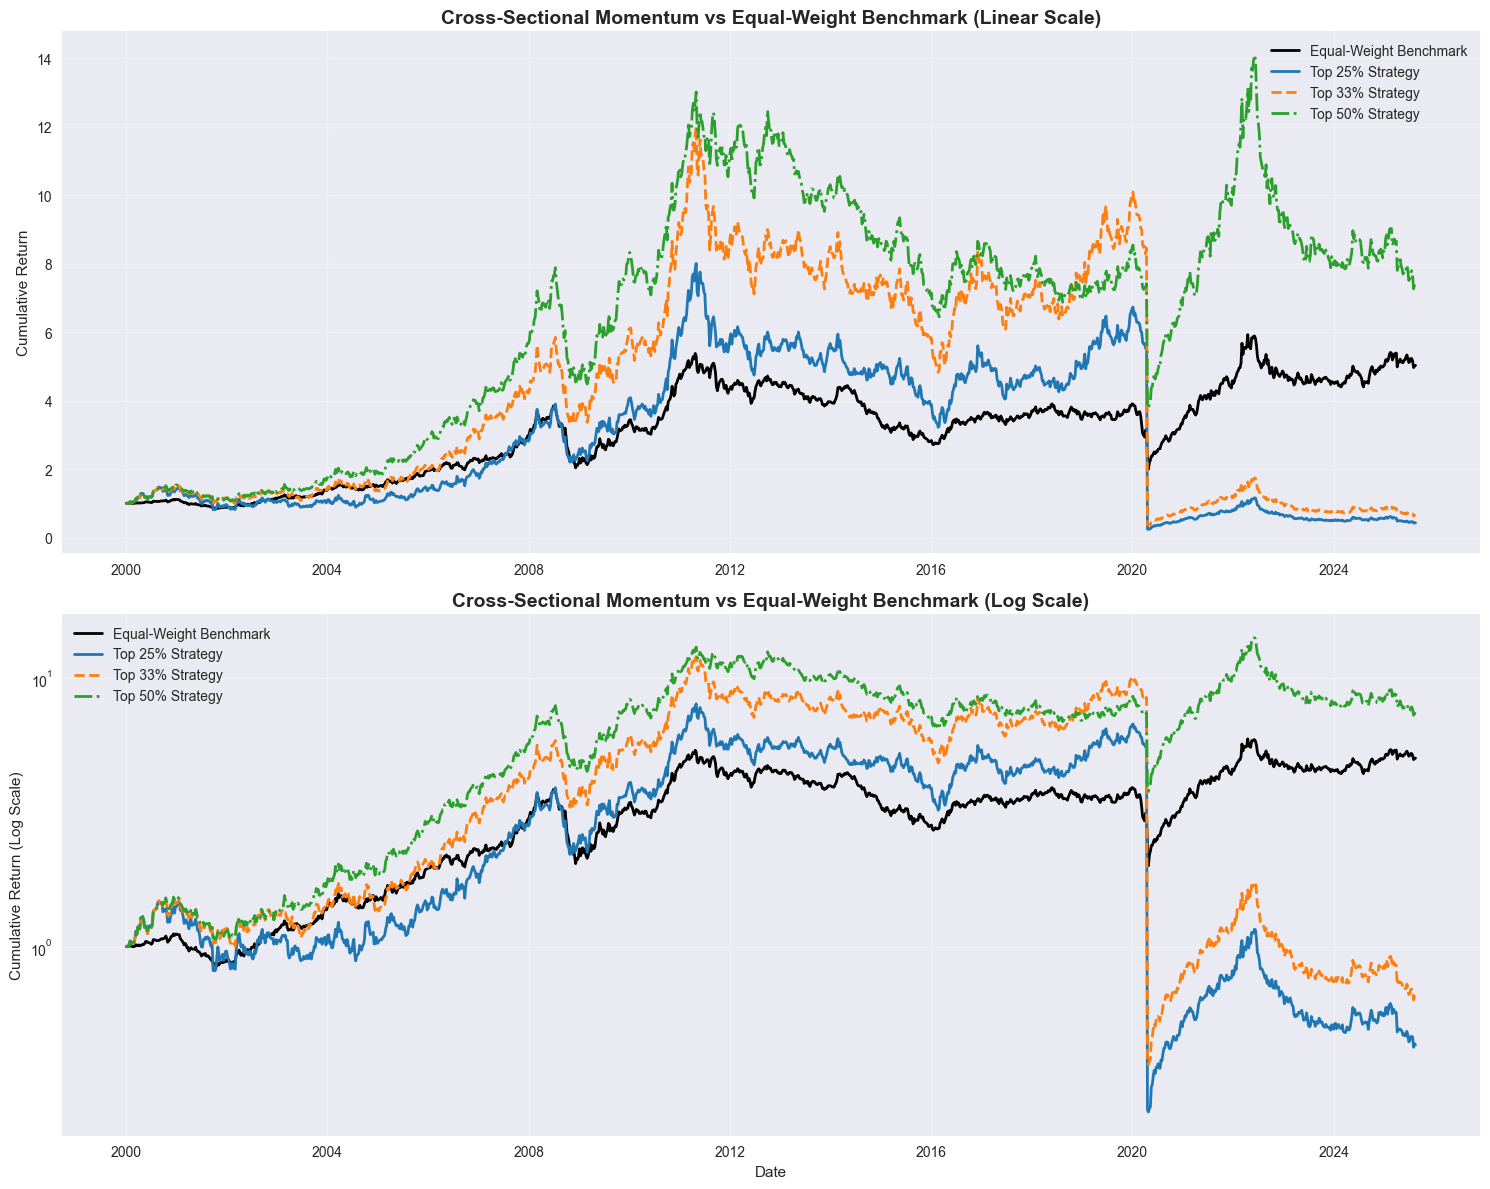

In [5]:
# Plot equity curves
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Colors and styles for plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
linestyles = ['-', '--', '-.', ':']

# Linear scale equity curves
benchmark_cumulative = results['Top 25%']['benchmark_cumulative']
ax1.plot(benchmark_cumulative.index, benchmark_cumulative.values, 
         color='black', linewidth=2, label='Equal-Weight Benchmark')

for i, label in enumerate(quantile_labels):
    strategy_cumulative = results[label]['strategy_cumulative']
    ax1.plot(strategy_cumulative.index, strategy_cumulative.values, 
             color=colors[i], linestyle=linestyles[i], linewidth=2, label=f'{label} Strategy')

ax1.set_title('Cross-Sectional Momentum vs Equal-Weight Benchmark (Linear Scale)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Cumulative Return')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Log scale equity curves for better comparison
ax2.plot(benchmark_cumulative.index, benchmark_cumulative.values, 
         color='black', linewidth=2, label='Equal-Weight Benchmark')

for i, label in enumerate(quantile_labels):
    strategy_cumulative = results[label]['strategy_cumulative']
    ax2.plot(strategy_cumulative.index, strategy_cumulative.values, 
             color=colors[i], linestyle=linestyles[i], linewidth=2, label=f'{label} Strategy')

ax2.set_yscale('log')
ax2.set_title('Cross-Sectional Momentum vs Equal-Weight Benchmark (Log Scale)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative Return (Log Scale)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Rolling Performance Analysis

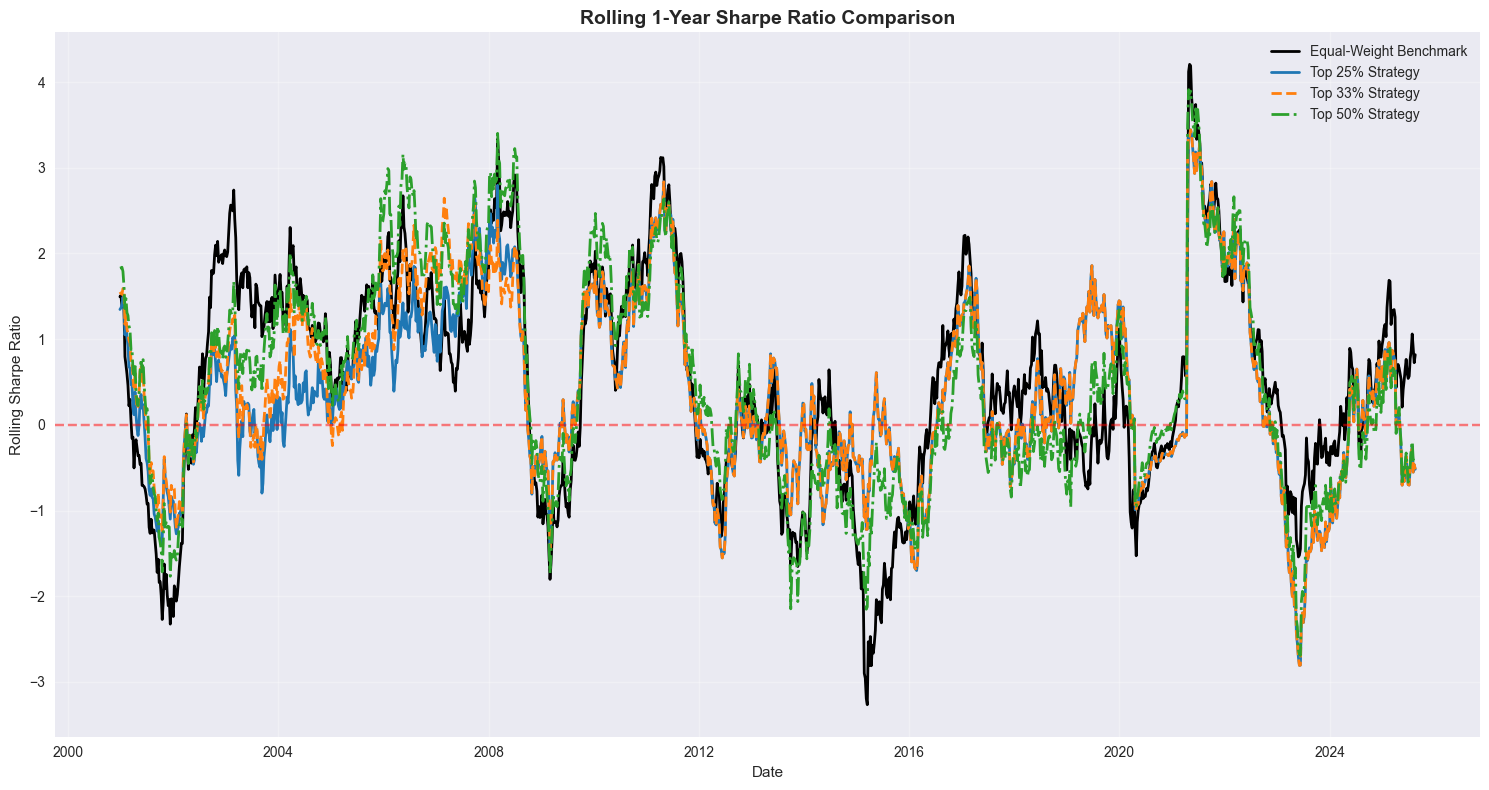

In [6]:
# Calculate rolling Sharpe ratios (52-week window)
fig, ax = plt.subplots(figsize=(15, 8))

window = 52  # 1 year rolling window

# Benchmark rolling Sharpe
benchmark_returns = results['Top 25%']['benchmark_returns'].dropna()
benchmark_rolling_sharpe = benchmark_returns.rolling(window).mean() / benchmark_returns.rolling(window).std() * np.sqrt(52)

ax.plot(benchmark_rolling_sharpe.index, benchmark_rolling_sharpe.values, 
        color='black', linewidth=2, label='Equal-Weight Benchmark')

# Strategy rolling Sharpe ratios
for i, label in enumerate(quantile_labels):
    strategy_returns = results[label]['strategy_returns'].dropna()
    strategy_rolling_sharpe = strategy_returns.rolling(window).mean() / strategy_returns.rolling(window).std() * np.sqrt(52)
    
    ax.plot(strategy_rolling_sharpe.index, strategy_rolling_sharpe.values, 
            color=colors[i], linestyle=linestyles[i], linewidth=2, label=f'{label} Strategy')

ax.set_title('Rolling 1-Year Sharpe Ratio Comparison', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Rolling Sharpe Ratio')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 6. Drawdown Analysis

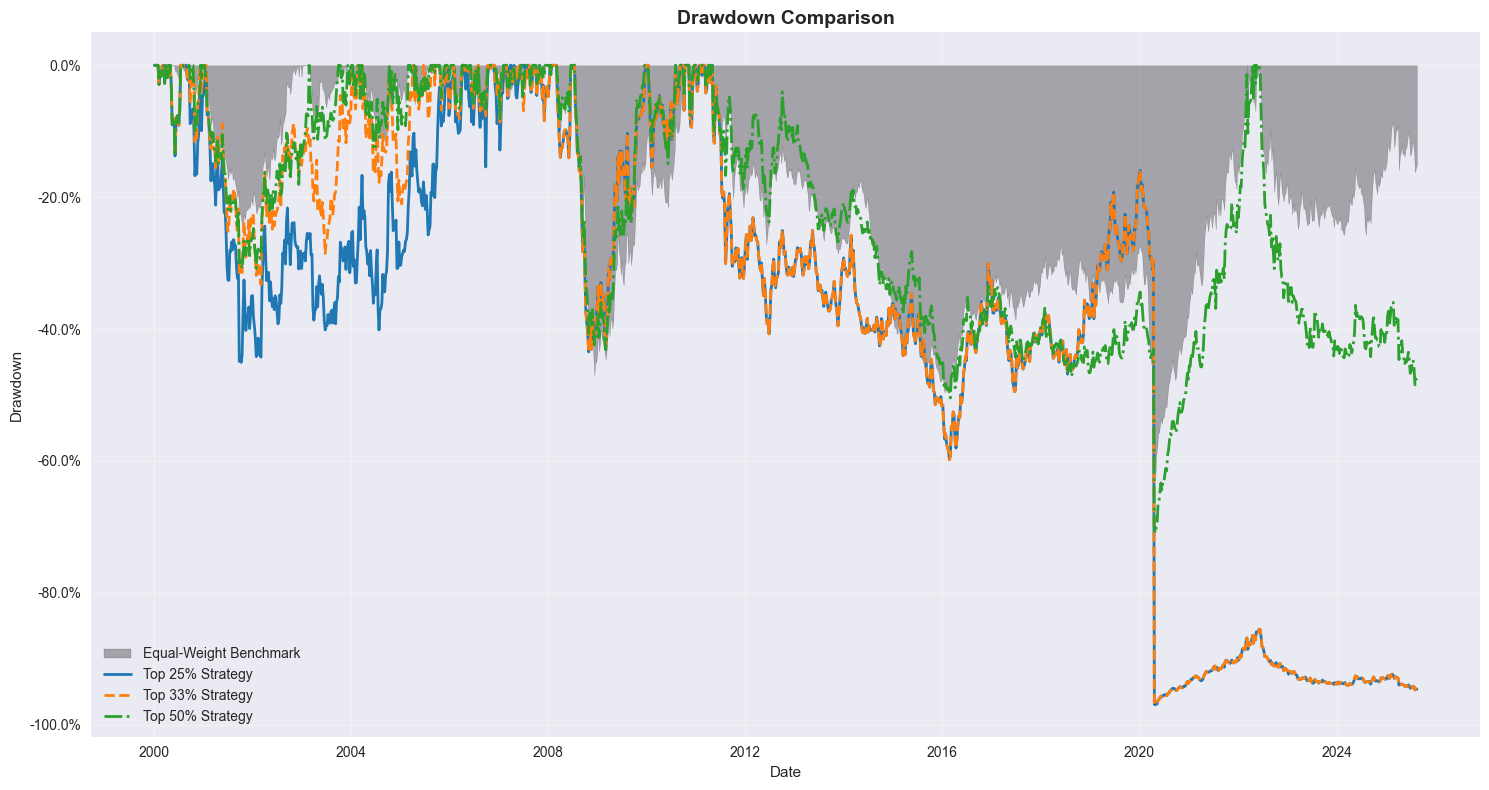

In [7]:
# Calculate and plot drawdowns
fig, ax = plt.subplots(figsize=(15, 8))

# Function to calculate drawdowns
def calculate_drawdowns(cumulative_returns):
    running_max = cumulative_returns.expanding().max()
    drawdowns = (cumulative_returns - running_max) / running_max
    return drawdowns

# Benchmark drawdowns
benchmark_cumulative = results['Top 25%']['benchmark_cumulative']
benchmark_drawdowns = calculate_drawdowns(benchmark_cumulative)
ax.fill_between(benchmark_drawdowns.index, benchmark_drawdowns.values, 0, 
                color='black', alpha=0.3, label='Equal-Weight Benchmark')

# Strategy drawdowns
for i, label in enumerate(quantile_labels):
    strategy_cumulative = results[label]['strategy_cumulative']
    strategy_drawdowns = calculate_drawdowns(strategy_cumulative)
    
    ax.plot(strategy_drawdowns.index, strategy_drawdowns.values, 
            color=colors[i], linestyle=linestyles[i], linewidth=2, label=f'{label} Strategy')

ax.set_title('Drawdown Comparison', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Drawdown')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim(ax.get_ylim()[0], 0.05)  # Set upper limit slightly above 0

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

plt.tight_layout()
plt.show()

## 7. Strategy Statistics Summary

In [8]:
# Create summary statistics
print("📈 CROSS-SECTIONAL MOMENTUM STRATEGY SUMMARY")
print("=" * 60)

# Find the best performing strategy
best_sharpe_strategy = metrics_comparison.loc['Sharpe Ratio'].idxmax()
best_return_strategy = metrics_comparison.loc['Annualized Return'].idxmax()

print(f"🏆 Best Sharpe Ratio: {best_sharpe_strategy}")
print(f"   Sharpe: {metrics_comparison.loc['Sharpe Ratio', best_sharpe_strategy]:.4f}")
print(f"   Annual Return: {metrics_comparison.loc['Annualized Return', best_sharpe_strategy]:.2%}")
print(f"   Volatility: {metrics_comparison.loc['Volatility', best_sharpe_strategy]:.2%}")
print(f"   Max Drawdown: {metrics_comparison.loc['Max Drawdown', best_sharpe_strategy]:.2%}")

print(f"\n💰 Best Return Strategy: {best_return_strategy}")
print(f"   Annual Return: {metrics_comparison.loc['Annualized Return', best_return_strategy]:.2%}")
print(f"   Sharpe: {metrics_comparison.loc['Sharpe Ratio', best_return_strategy]:.4f}")
print(f"   Max Drawdown: {metrics_comparison.loc['Max Drawdown', best_return_strategy]:.2%}")

# Benchmark comparison
benchmark_sharpe = metrics_comparison.loc['Sharpe Ratio', 'Equal-Weight Benchmark']
benchmark_return = metrics_comparison.loc['Annualized Return', 'Equal-Weight Benchmark']

print(f"\n📊 Benchmark Performance:")
print(f"   Annual Return: {benchmark_return:.2%}")
print(f"   Sharpe: {benchmark_sharpe:.4f}")

print(f"\n🎯 Strategy vs Benchmark:")
for label in quantile_labels:
    strategy_sharpe = metrics_comparison.loc['Sharpe Ratio', f'{label} Strategy']
    sharpe_improvement = strategy_sharpe - benchmark_sharpe
    print(f"   {label}: Sharpe improvement of {sharpe_improvement:+.4f}")

print(f"\n📝 Key Insights:")
print(f"   • Cross-sectional momentum {'outperforms' if best_sharpe_strategy != 'Equal-Weight Benchmark' else 'underperforms'} equal-weight benchmark")
print(f"   • {'Concentrated' if '25%' in best_sharpe_strategy else 'Diversified'} approach shows best risk-adjusted returns")
print(f"   • Weekly rebalancing captures short-term commodity momentum effectively")

📈 CROSS-SECTIONAL MOMENTUM STRATEGY SUMMARY
🏆 Best Sharpe Ratio: Equal-Weight Benchmark
   Sharpe: 0.3810
   Annual Return: 6.48%
   Volatility: 17.00%
   Max Drawdown: -62.82%

💰 Best Return Strategy: Top 50% Strategy
   Annual Return: 8.04%
   Sharpe: 0.3705
   Max Drawdown: -70.97%

📊 Benchmark Performance:
   Annual Return: 6.48%
   Sharpe: 0.3810

🎯 Strategy vs Benchmark:
   Top 25%: Sharpe improvement of -0.4778
   Top 33%: Sharpe improvement of -0.4340
   Top 50%: Sharpe improvement of -0.0105

📝 Key Insights:
   • Cross-sectional momentum underperforms equal-weight benchmark
   • Diversified approach shows best risk-adjusted returns
   • Weekly rebalancing captures short-term commodity momentum effectively
